# Word Vector

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/wordvector](https://github.com/huseinzol05/Malaya/tree/master/example/wordvector).
    
</div>

### Pretrained word2vec

You can download Malaya pretrained without need to import malaya.

#### word2vec from local news

[size-256](https://github.com/huseinzol05/Malaya/tree/master/pretrained-model/wordvector#download)

#### word2vec from wikipedia

[size-256](https://github.com/huseinzol05/Malaya/tree/master/pretrained-model/wordvector#download)

#### word2vec from local social media

[size-256](https://github.com/huseinzol05/Malaya/tree/master/pretrained-model/wordvector#download)

But If you don't know what to do with malaya word2vec, Malaya provided some useful functions for you!

In [1]:
%%time
import malaya
%matplotlib inline

/Users/huseinzolkepli/Documents/Malaya/malaya/preprocessing.py:259: FutureWarning: Possible nested set at position 2289
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))


CPU times: user 5.37 s, sys: 972 ms, total: 6.35 s
Wall time: 6.73 s


### Load malaya news word2vec

```python
def load_news():
    """
    Return malaya pretrained local malaysia news word2vec size 256. https://github.com/huseinzol05/Malaya/tree/master/pretrained-model/wordvector

    Returns
    -------
    vocabulary: indices dictionary for `vector`.
    vector: np.array, 2D.
    """
```

In [2]:
vocab_news, embedded_news = malaya.wordvector.load_news()

### Load malaya wikipedia word2vec

```python
def load_wiki():
    """
    Return malaya pretrained wikipedia word2vec size 256. 
    https://github.com/huseinzol05/Malaya/tree/master/pretrained-model/wordvector

    Returns
    -------
    vocabulary: indices dictionary for `vector`.
    vector: np.array, 2D.
    """
```

In [6]:
vocab_wiki, embedded_wiki = malaya.wordvector.load_wiki()

### Load word vector interface

```python

def load(embed_matrix, dictionary):

    """
    Return malaya.wordvector._wordvector object.

    Parameters
    ----------
    embed_matrix: numpy array
    dictionary: dictionary

    Returns
    -------
    _wordvector: malaya.wordvector._wordvector object
    """
    
```

1. `embed_matrix` must be a 2d,

```python

array([[ 0.25      , -0.10816103, -0.19881412, ...,  0.40432587,
         0.19388093, -0.07062137],
       [ 0.3231817 , -0.01318745, -0.17950962, ...,  0.25      ,
         0.08444146, -0.11705721],
       [ 0.29103908, -0.16274083, -0.20255531, ...,  0.25      ,
         0.06253044, -0.16404966],
       ...,
       [ 0.21346697,  0.12686132, -0.4029543 , ...,  0.43466234,
         0.20910986, -0.32219803],
       [ 0.2372157 ,  0.32420087, -0.28036436, ...,  0.2894639 ,
         0.20745888, -0.30600077],
       [ 0.27907744,  0.35755727, -0.34932107, ...,  0.37472805,
         0.42045262, -0.21725406]], dtype=float32)
```

2. `dictionary`, a dictionary mapped `{'word': 0}`,

```python

{'mengembanfkan': 394623,
 'dipujanya': 234554,
 'comicolor': 182282,
 'immaz': 538660,
 'qabar': 585119,
 'phidippus': 180802,
}

```

#### Load custom word vector

Like fast-text, example, I download from here, https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.ms.vec

We need to parse the data to get `embed_matrix` and `dictionary`.

In [ ]:
import io
import numpy as np

fin = io.open('wiki.ms.vec', 'r', encoding='utf-8', newline='\n', errors='ignore')
n, d = map(int, fin.readline().split())

data, vectors = {}, []
for no, line in enumerate(fin):
    tokens = line.rstrip().split(' ')
    data[tokens[0]] = no
    vectors.append(list(map(float, tokens[1:])))
    
vectors = np.array(vectors)
fast_text = malaya.wordvector.load(vectors, data)

In [8]:
word_vector_news = malaya.wordvector.load(embedded_news, vocab_news)
word_vector_wiki = malaya.wordvector.load(embedded_wiki, vocab_wiki)

### Check top-k similar semantics based on a word

```python
def n_closest(
    self,
    word: str,
    num_closest: int = 5,
    metric: str = 'cosine',
    return_similarity: bool = True,
):
    """
    find nearest words based on a word.

    Parameters
    ----------
    word: str
        Eg, 'najib'
    num_closest: int, (default=5)
        number of words closest to the result.
    metric: str, (default='cosine')
        vector distance algorithm.
    return_similarity: bool, (default=True)
        if True, will return between 0-1 represents the distance.

    Returns
    -------
    word_list: list of nearest words
    """
```

In [11]:
word = 'anwar'
print("Embedding layer: 8 closest words to: '%s' using malaya news word2vec"%(word))
print(word_vector_news.n_closest(word=word, num_closest=8, metric='cosine'))

Embedding layer: 8 closest words to: 'anwar' using malaya news word2vec
[['najib', 0.6967672109603882], ['mukhriz', 0.675892174243927], ['azmin', 0.6686884164810181], ['rafizi', 0.6465028524398804], ['muhyiddin', 0.6413404941558838], ['daim', 0.6334482431411743], ['khairuddin', 0.6300410032272339], ['shahidan', 0.6269811391830444]]


In [12]:
word = 'anwar'
print("Embedding layer: 8 closest words to: '%s' using malaya wiki word2vec"%(word))
print(word_vector_wiki.n_closest(word=word, num_closest=8, metric='cosine'))

Embedding layer: 8 closest words to: 'anwar' using malaya wiki word2vec
[['rasulullah', 0.6918460130691528], ['jamal', 0.6604709029197693], ['noraniza', 0.65153968334198], ['khalid', 0.6450133323669434], ['mahathir', 0.6447468400001526], ['sukarno', 0.641593337059021], ['wahid', 0.6359774470329285], ['pekin', 0.6262176036834717]]


### Check batch top-k similar semantics based on a word

```python
def batch_n_closest(
    self,
    words: List[str],
    num_closest: int = 5,
    return_similarity: bool = False,
    soft: bool = True,
):
    """
    find nearest words based on a batch of words using Tensorflow.

    Parameters
    ----------
    words: list
        Eg, ['najib','anwar']
    num_closest: int, (default=5)
        number of words closest to the result.
    return_similarity: bool, (default=True)
        if True, will return between 0-1 represents the distance.
    soft: bool, (default=True)
        if True, a word not in the dictionary will be replaced with nearest JaroWinkler ratio.
        if False, it will throw an exception if a word not in the dictionary.

    Returns
    -------
    word_list: list of nearest words
    """
```

In [13]:
words = ['anwar', 'mahathir']
word_vector_news.batch_n_closest(words, num_closest=8,
                                 return_similarity=False)

[['anwar',
  'najib',
  'mukhriz',
  'azmin',
  'rafizi',
  'muhyiddin',
  'daim',
  'khairuddin'],
 ['mahathir',
  'daim',
  'sahruddin',
  'streram',
  'morsi',
  'anifah',
  'jokowi',
  'ramasamy']]

What happen if a word not in the dictionary?

You can set parameter `soft` to `True` or `False`. Default is `True`.

if `True`, a word not in the dictionary will be replaced with nearest JaroWrinkler ratio.

if `False`, it will throw an exception if a word not in the dictionary.

In [14]:
words = ['anwar', 'mahathir','husein-comel']
word_vector_wiki.batch_n_closest(words, num_closest=8,
                                 return_similarity=False,soft=False)

Exception: husein-comel not in dictionary, please use another word or set `soft` = True

In [15]:
words = ['anwar', 'mahathir','husein-comel']
word_vector_wiki.batch_n_closest(words, num_closest=8,
                                 return_similarity=False,soft=True)

[['anwar',
  'rasulullah',
  'jamal',
  'noraniza',
  'khalid',
  'mahathir',
  'sukarno',
  'wahid'],
 ['mahathir',
  'anwar',
  'wahid',
  'najib',
  'khalid',
  'sukarno',
  'suharto',
  'salahuddin'],
 ['husein',
  'khairi',
  'gccsa',
  'jkrte',
  'montagny',
  'pejudo',
  'badriyyin',
  'naginatajutsu']]

### Word2vec calculator

You can put any equation you wanted.

```python
def calculator(
    self,
    equation: str,
    num_closest: int = 5,
    metric: str = 'cosine',
    return_similarity: bool = True,
):
    """
    calculator parser for word2vec.

    Parameters
    ----------
    equation: str
        Eg, '(mahathir + najib) - rosmah'
    num_closest: int, (default=5)
        number of words closest to the result.
    metric: str, (default='cosine')
        vector distance algorithm.
    return_similarity: bool, (default=True)
        if True, will return between 0-1 represents the distance.

    Returns
    -------
    word_list: list of nearest words
    """
```

In [18]:
word_vector_news.calculator('anwar + amerika + mahathir', num_closest=8, metric='cosine',
                      return_similarity=False)

['mahathir',
 'anwar',
 'trump',
 'duterte',
 'netanyahu',
 'jokowi',
 'rusia',
 'kj',
 'obama']

In [19]:
word_vector_wiki.calculator('anwar + amerika + mahathir', num_closest=8, metric='cosine',
                      return_similarity=False)

['mahathir',
 'anwar',
 'sukarno',
 'suharto',
 'hamas',
 'sparta',
 'amerika',
 'iraq',
 'lubnan']

### Visualize scatter-plot

```python
def scatter_plot(
    self,
    labels,
    centre: str = None,
    figsize: Tuple[int, int] = (7, 7),
    plus_minus: int = 25,
    handoff: float = 5e-5,
):
    """
    plot a scatter plot based on output from calculator / n_closest / analogy.

    Parameters
    ----------
    labels : list
        output from calculator / n_closest / analogy
    centre : str, (default=None)
        centre label, if a str, it will annotate in a red color.
    figsize : tuple, (default=(7, 7))
        figure size for plot.

    Returns
    -------
    tsne: np.array, 2D.
    """
```

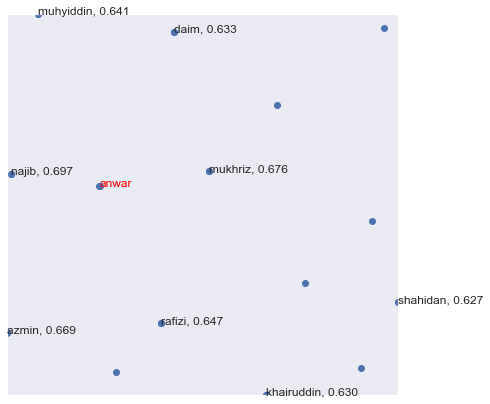

In [20]:
word = 'anwar'
result = word_vector_news.n_closest(word=word, num_closest=8, metric='cosine')
data = word_vector_news.scatter_plot(result, centre = word)

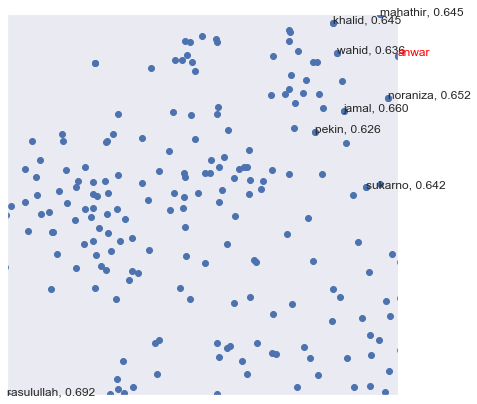

In [21]:
word = 'anwar'
result = word_vector_wiki.n_closest(word=word, num_closest=8, metric='cosine')
data = word_vector_wiki.scatter_plot(result, centre = word)

### Visualize tree-plot

```python
def tree_plot(
    self, labels, figsize: Tuple[int, int] = (7, 7), annotate: bool = True
):
    """
    plot a tree plot based on output from calculator / n_closest / analogy.

    Parameters
    ----------
    labels : list
        output from calculator / n_closest / analogy.
    visualize : bool
        if True, it will render plt.show, else return data.
    figsize : tuple, (default=(7, 7))
        figure size for plot.

    Returns
    -------
    embed: np.array, 2D.
    labelled: labels for X / Y axis.
    """
```

<Figure size 504x504 with 0 Axes>

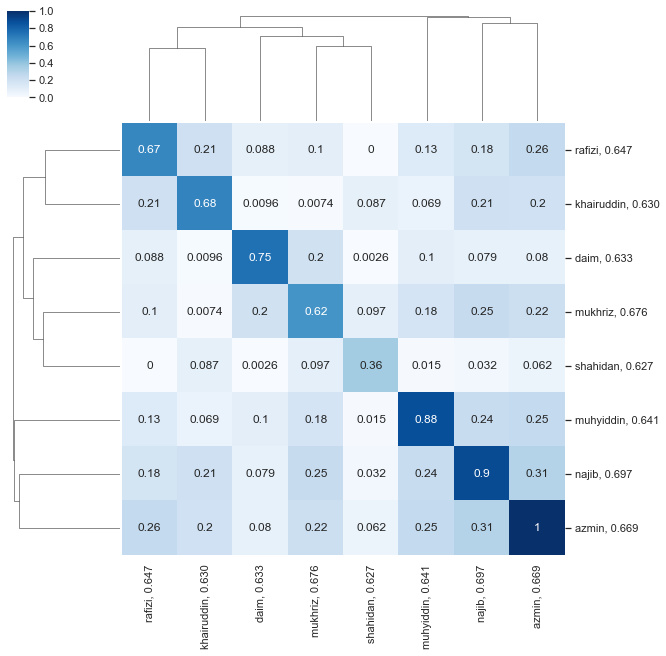

In [22]:
word = 'anwar'
result = word_vector_news.n_closest(word=word, num_closest=8, metric='cosine')
data = word_vector_news.tree_plot(result)

<Figure size 504x504 with 0 Axes>

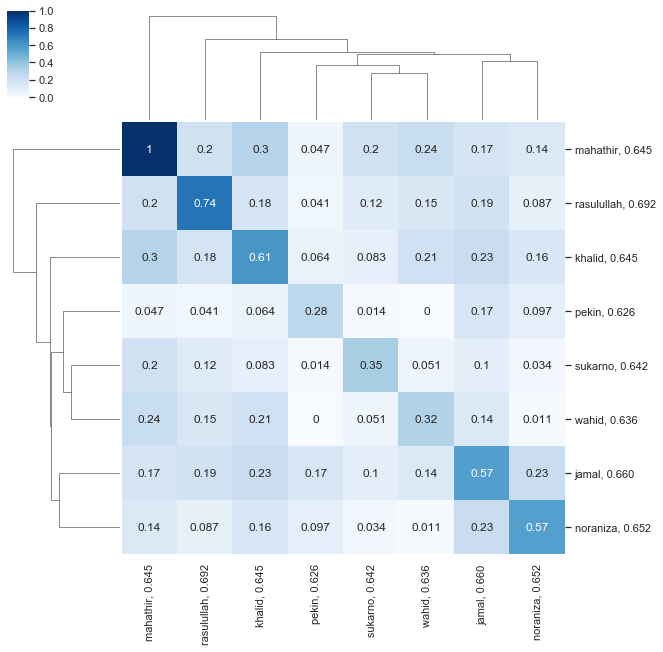

In [23]:
word = 'anwar'
result = word_vector_wiki.n_closest(word=word, num_closest=8, metric='cosine')
data = word_vector_wiki.tree_plot(result)

### Visualize social-network

```python

def network(
    self,
    word,
    num_closest = 8,
    depth = 4,
    min_distance = 0.5,
    iteration = 300,
    figsize = (15, 15),
    node_color = '#72bbd0',
    node_factor = 50,
):

    """
    plot a social network based on word given

    Parameters
    ----------
    word : str
        centre of social network.
    num_closest: int, (default=8)
        number of words closest to the node.
    depth: int, (default=4)
        depth of social network. More deeper more expensive to calculate, big^O(num_closest ** depth).
    min_distance: float, (default=0.5)
        minimum distance among nodes. Increase the value to increase the distance among nodes.
    iteration: int, (default=300)
        number of loops to train the social network to fit min_distace.
    figsize: tuple, (default=(15, 15))
        figure size for plot.
    node_color: str, (default='#72bbd0')
        color for nodes.
    node_factor: int, (default=10)
        size factor for depth nodes. Increase this value will increase nodes sizes based on depth.
        
```

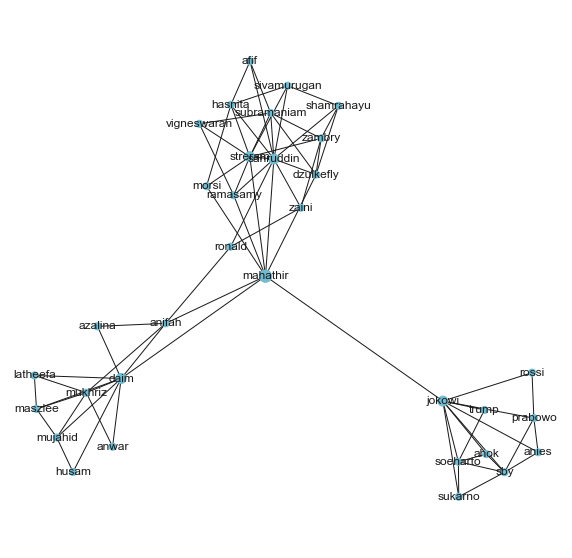

In [24]:
g = word_vector_news.network('mahathir', figsize = (10, 10), node_factor = 50, depth = 3)

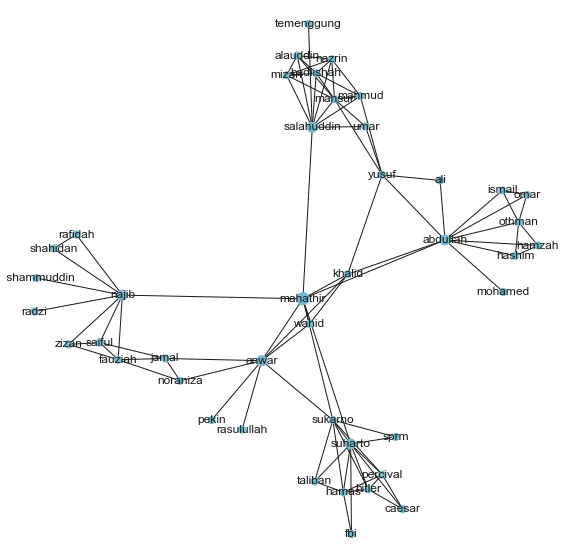

In [25]:
g = word_vector_wiki.network('mahathir', figsize = (10, 10), node_factor = 50, depth = 3)

### Get embedding from a word

```python
def get_vector_by_name(
    self, word: str, soft: bool = False, topn_soft: int = 5
):
    """
    get vector based on string.

    Parameters
    ----------
    word: str
    soft: bool, (default=True)
        if True, a word not in the dictionary will be replaced with nearest JaroWinkler ratio.
        if False, it will throw an exception if a word not in the dictionary.
    topn_soft: int, (default=5)
        if word not found in dictionary, will returned `topn_soft` size of similar size using jarowinkler.

    Returns
    -------
    vector: np.array, 1D
    """
```

In [28]:
word_vector_wiki.get_vector_by_name('najib').shape

(256,)

If a word not found in the vocabulary, it will throw an exception with top-5 nearest words

In [26]:
word_vector_wiki.get_vector_by_name('husein-comel')

Exception: input not found in dictionary, here top-5 nearest words [husein, husei, husenil, husen, secomel]